In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

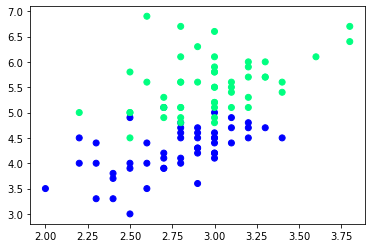

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [16]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
78,2.9,4.5,1
104,3.0,5.8,2
73,2.8,4.7,1
94,2.7,4.2,1
66,3.0,4.5,1
98,2.5,3.0,1
76,2.8,4.8,1
54,2.8,4.6,1
61,3.0,4.2,1


In [17]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [18]:
df_train

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
68,2.2,4.5,1
133,2.8,5.1,2
74,2.9,4.3,1
69,2.5,3.9,1
97,2.9,4.3,1
101,2.7,5.1,2
84,3.0,4.5,1
53,2.3,4.0,1
87,2.3,4.4,1


In [19]:
df_val

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
92,2.6,4.0,1
77,3.0,5.0,1
123,2.7,4.9,2
79,2.6,3.5,1


In [20]:
df_test

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
88,3.0,4.1,1
124,3.3,5.7,2
119,2.2,5.0,2
72,2.5,4.9,1


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [24]:
y_test

array([2, 1, 1, 2, 1])

# Case 1 - Bagging

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
84,3.0,4.5,1
97,2.9,4.3,1
65,3.1,4.4,1
133,2.8,5.1,2
97,2.9,4.3,1
74,2.9,4.3,1
53,2.3,4.0,1


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [27]:
dt_bag1 = DecisionTreeClassifier()

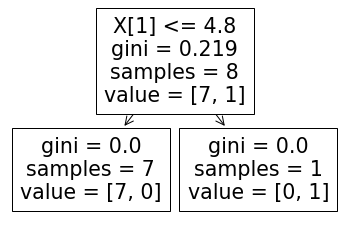

0.8


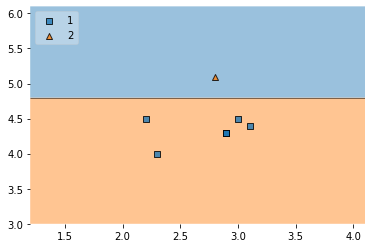

In [29]:
evaluate(dt_bag1,X,y)

In [30]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
68,2.2,4.5,1
53,2.3,4.0,1
53,2.3,4.0,1
74,2.9,4.3,1
97,2.9,4.3,1
74,2.9,4.3,1
69,2.5,3.9,1


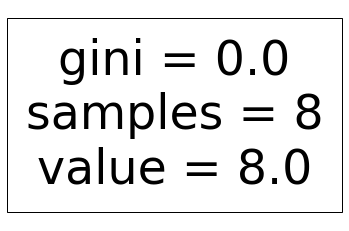

0.6


/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


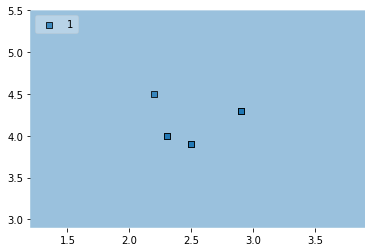

In [31]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
101,2.7,5.1,2
97,2.9,4.3,1
65,3.1,4.4,1
97,2.9,4.3,1
65,3.1,4.4,1
87,2.3,4.4,1
69,2.5,3.9,1


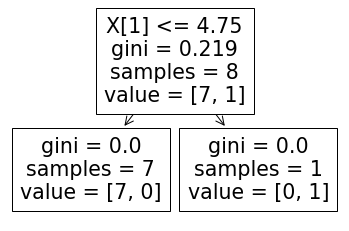

0.8


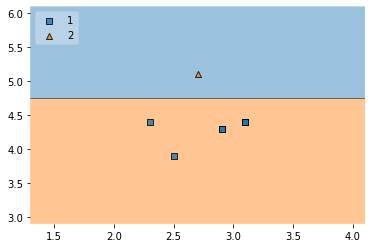

In [33]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [28]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
88,3.0,4.1,1
124,3.3,5.7,2
119,2.2,5.0,2
72,2.5,4.9,1


In [36]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


# Pasting

In [57]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
131,3.8,6.4,2
137,3.1,5.5,2
130,2.8,6.1,2
145,3.0,5.2,2
52,3.1,4.9,1
96,2.9,4.2,1
75,3.0,4.4,1
100,3.3,6.0,2
53,2.3,4.0,1


In [58]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
52,3.1,4.9,1
122,2.8,6.7,2
130,2.8,6.1,2
53,2.3,4.0,1
96,2.9,4.2,1
145,3.0,5.2,2
75,3.0,4.4,1


# Random Subspaces

In [60]:
df1 = pd.read_csv('/kaggle/input/iris/Iris.csv')
df1 = df1.sample(10)

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [66]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Species
134,2.6,Iris-virginica
12,3.0,Iris-setosa
13,3.0,Iris-setosa
146,2.5,Iris-virginica
38,3.0,Iris-setosa
62,2.2,Iris-versicolor
77,3.0,Iris-versicolor
45,3.0,Iris-setosa
109,3.6,Iris-virginica
10,3.7,Iris-setosa


# Random Patches

In [67]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [69]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
38,4.4,39
10,5.4,11
109,7.2,110
62,6.0,63
134,6.1,135
12,4.8,13
10,5.4,11
134,6.1,135
